In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator as idg
ImageDataGenerator = idg
# can upload images in batches, augmentation.
from keras.models import Sequential
from keras import layers
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras import optimizers

In [21]:
train_datagen = idg(rescale = 1/255)
# vertical_flip =true, horizontal_flip =true
validation_datagen = idg(rescale = 1/255)
test_datagen = idg(rescale = 1/255)

In [22]:
# Read the training sample and set the batch size for target size
train_generator = train_datagen.flow_from_directory(
    'plant_village/train',
    target_size = (64, 64),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 3002 images belonging to 4 classes.


In [23]:
# Read the validation sample and set the batch size for target size
validation_generator = validation_datagen.flow_from_directory(
    'plant_village/val',
    target_size = (64, 64),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 635 images belonging to 4 classes.


In [24]:
# Read the test sample and set the batch size for target size
test_generator = test_datagen.flow_from_directory(
    'plant_village/test',
    target_size = (64, 64),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 546 images belonging to 4 classes.


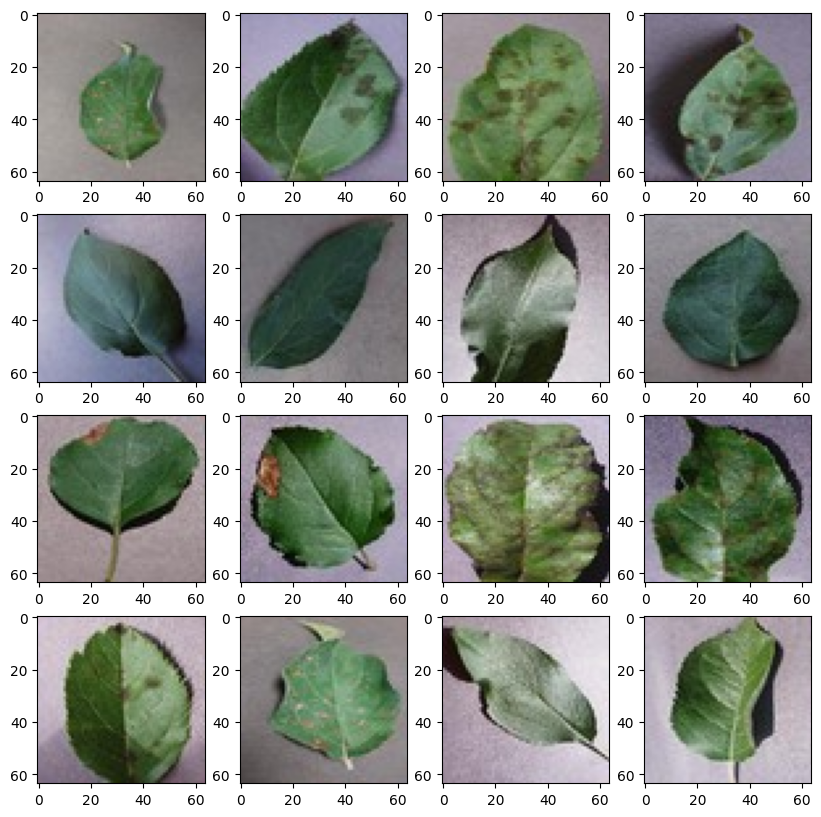

In [25]:
plt.figure(figsize=(10, 10))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    img, label = test_generator.next()
    plt.imshow(img[0])
plt.show()

In [26]:
img[0].shape

(64, 64, 3)

In [27]:
from keras.applications.vgg16 import VGG16
basemodel = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
basemodel.trainable=False
basemodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [28]:
Flatten_layer = layers.GlobalAveragePooling2D()
Prediction_layer = layers.Dense(4, activation="Softmax")
modelNew = Sequential([basemodel, Flatten_layer, Prediction_layer])
modelNew.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 14,716,740
Trainable params: 2,052
Non-trainable params: 14,714,688
_________________________________________________________________


# Create the Model

In [29]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu', input_shape = (64, 64, 3)))
model.add(Conv2D(32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(128, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(4, activation = 'softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 conv2d_10 (Conv2D)          (None, 58, 58, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 128)       73856     
                                                      

In [30]:
modelNew.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])

# Train the model
history = modelNew.fit(train_generator,
                    steps_per_epoch=train_generator.samples/train_generator.batch_size,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples/validation_generator.batch_size,
                    verbose=1) #type:ignore

Epoch 1/5
187/187 [==============================] - 92s 484ms/step - loss: 0.9231 - acc: 0.6462 - val_loss: 0.6561 - val_acc: 0.7921
Epoch 2/5
187/187 [==============================] - 93s 498ms/step - loss: 0.5932 - acc: 0.8198 - val_loss: 0.4951 - val_acc: 0.8787
Epoch 3/5
187/187 [==============================] - 91s 484ms/step - loss: 0.4726 - acc: 0.8668 - val_loss: 0.4165 - val_acc: 0.8929
Epoch 4/5
187/187 [==============================] - 92s 490ms/step - loss: 0.4046 - acc: 0.8854 - val_loss: 0.3649 - val_acc: 0.9118
Epoch 5/5
187/187 [==============================] - 92s 488ms/step - loss: 0.3614 - acc: 0.8954 - val_loss: 0.3289 - val_acc: 0.9134


In [31]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples/train_generator.batch_size,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples/validation_generator.batch_size,
                    verbose=1) #type:ignore

Epoch 1/5
187/187 [==============================] - 189s 1s/step - loss: 1.0446 - acc: 0.5720 - val_loss: 0.7044 - val_acc: 0.7307
Epoch 2/5
187/187 [==============================] - 195s 1s/step - loss: 0.6055 - acc: 0.7732 - val_loss: 0.5130 - val_acc: 0.8315
Epoch 3/5
187/187 [==============================] - 191s 1s/step - loss: 0.4819 - acc: 0.8274 - val_loss: 0.4750 - val_acc: 0.8252
Epoch 4/5
187/187 [==============================] - 186s 993ms/step - loss: 0.3699 - acc: 0.8704 - val_loss: 0.4068 - val_acc: 0.8598
Epoch 5/5
187/187 [==============================] - 188s 1s/step - loss: 0.3419 - acc: 0.8844 - val_loss: 0.3714 - val_acc: 0.8661
